In [1]:
import sys
from pygod.metric import eval_roc_auc
sys.path.append('..')
from torch_geometric.utils import to_networkx
from matplotlib import pyplot as plt
import networkx as nx
from Utils.experiment_results import Experiment

from experiments import run_local_dice

experiment_before_poison, experiment_after_poison, node_idxs, y_binary = run_local_dice()

DEBUG:root:Inferred 'filter_per_worker=True' option for feature fetching routines of the data loader
DEBUG:root:Inferred 'filter_per_worker=True' option for feature fetching routines of the data loader
DEBUG:root:There are 2707 nodes in the graph
DEBUG:root:Nodes affected: [2656]
DEBUG:root:Inferred 'filter_per_worker=True' option for feature fetching routines of the data loader


tensor([1., 1., 1.,  ..., 1., 1., 1.])
node_attrs
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
adj
SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([ 633, 1862, 2582,  ...,  598, 1473, 2706]),
             val=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
             size=(2708, 2708), nnz=11054, density=0.15%)
labels
tensor([0, 0, 0,  ..., 0, 0, 0])
node to atk 2656
These are the node_idxs: $[2656]


DEBUG:root:Inferred 'filter_per_worker=True' option for feature fetching routines of the data loader


auc before poison:
0.7678114250267863
auc after poison:
0.7664495573225061


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\andwh\\Anaconda3\\envs\\PyG\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\andwh\\Anaconda3\\envs\\PyG\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\an

found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found oran

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ARIALN.TTF', name='Arial', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 6.613636363636363
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\FRAHV.TTF', name='Franklin Gothic Heavy', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibril.ttf', name='Calibri', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRITANIC.TTF', name='Britannic Bold', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\seguisb.ttf', name='Segoe UI', style='normal', variant='normal', weight

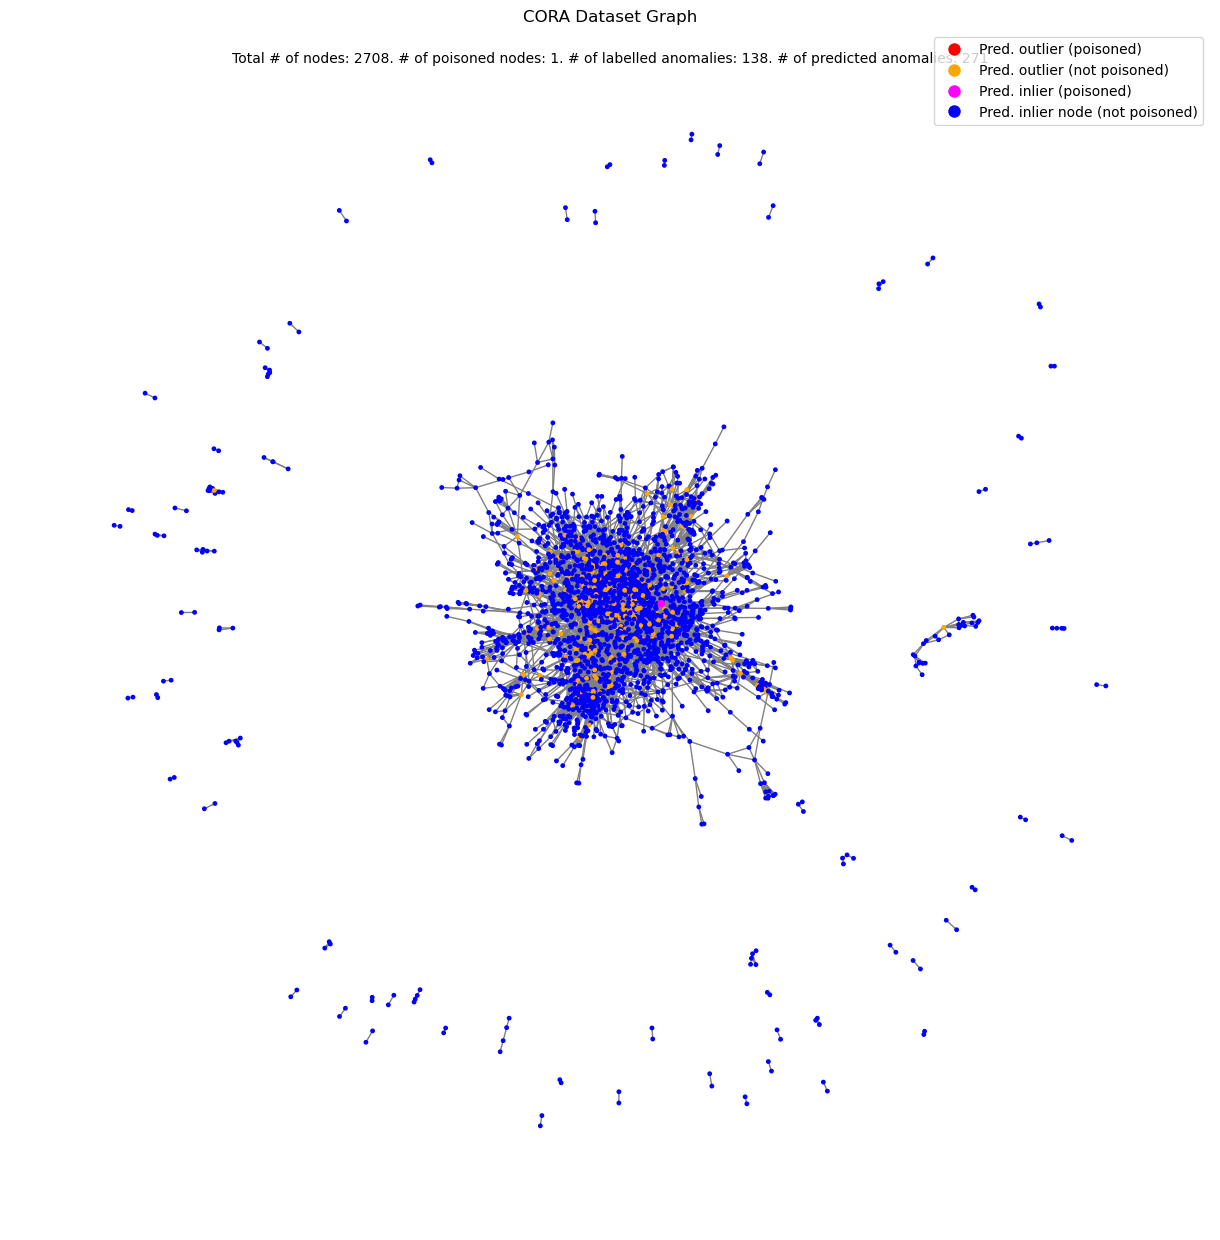

found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found oran

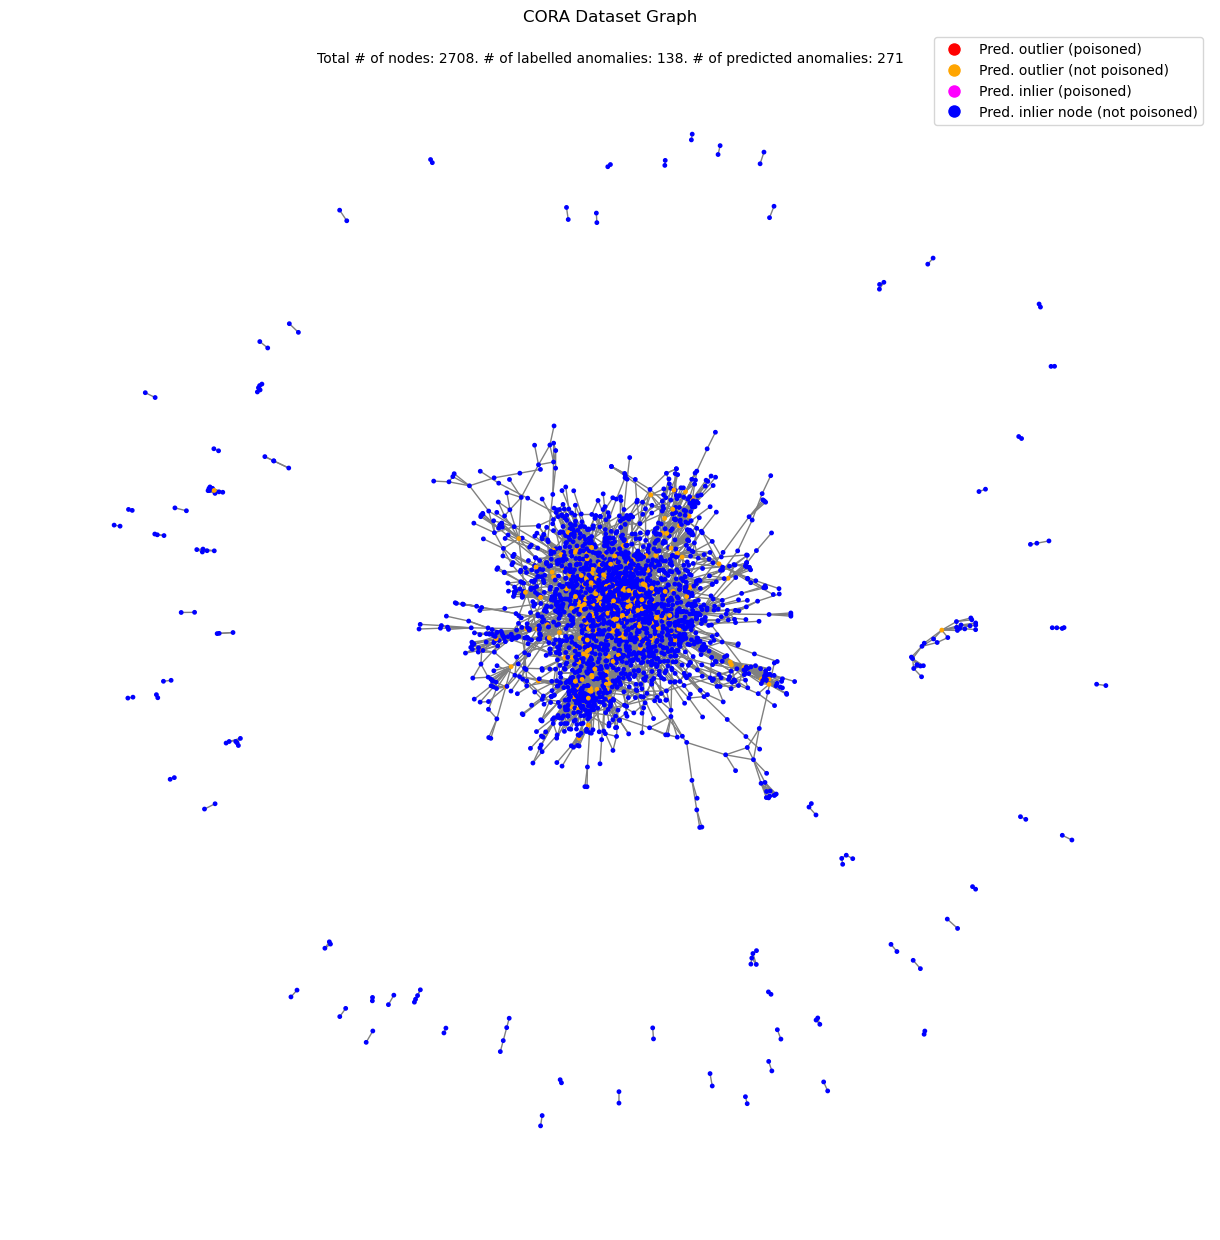

In [2]:
# Convert PyTorch Geometric data to NetworkX graph ---


# assign red to outliers and blue to regular, based on predictions
# for i in range(pred.numel()):
#     if pred[i].item() == 1: 
#         node_colors.append('red')
#     else:
#         node_colors.append('blue')
def count_anomalies():
    count = 0
    for i in y_binary:
        if i == 1:
            count += 1
    
    return count

def count_predicted_anomalies(predictions):
    count = 0
    for i in predictions:
        if i == 1:
            count += 1
    
    return count

    

def visualize_graph(experiment: Experiment, node_idxs = None):
    node_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'yellow'}

    node_size = []
    if node_idxs is not None:
        for i in range(experiment.pred.numel()):
            if i in node_idxs:
                node_size.append(20)
            else:
                node_size.append(6)


    graph3 = to_networkx(experiment.data, to_undirected=True)
    my_pos = nx.spring_layout(graph3, seed = 100)
    node_colors = []
    for i in range(experiment.pred.numel()):
        if experiment.pred[i].item() == 1 and node_idxs is not None and i in node_idxs: 
            print("found red prob")
            node_colors.append('red')
        elif experiment.pred[i].item() == 1:
            print("found orange prob")
            node_colors.append('orange')
        elif experiment.pred[i].item() == 0 and node_idxs is not None and i in node_idxs:
            print("found yellow prob")
            node_colors.append('magenta')
        else:
            node_colors.append('blue')
        
    # Draws the graph ----
    plt.figure(figsize=(12, 12))
    if node_idxs is not None:
        nx.draw(graph3, pos=my_pos, node_size=node_size, node_color=node_colors, edge_color='gray', with_labels=False)
        text = f'Total # of nodes: {experiment.data.size()[0]}. # of poisoned nodes: {len(node_idxs)}. # of labelled anomalies: {count_anomalies()}. # of predicted anomalies: {count_predicted_anomalies(experiment.pred)}'
        legend_colors = {'red': 'Pred. outlier (poisoned)', 'orange': 'Pred. outlier (not poisoned)', 'magenta': 'Pred. inlier (poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}
    else:
        nx.draw(graph3, pos=my_pos, node_size=6, node_color=node_colors, edge_color='gray', with_labels=False)
        text = f'Total # of nodes: {experiment.data.size()[0]}. # of labelled anomalies: {count_anomalies()}. # of predicted anomalies: {count_predicted_anomalies(experiment.pred)}'
        legend_colors = {'orange': 'Pred. outlier (not poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}

    legend_colors = {'red': 'Pred. outlier (poisoned)', 'orange': 'Pred. outlier (not poisoned)', 'magenta': 'Pred. inlier (poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in legend_colors.items()]
    plt.legend(handles=legend_handles, loc='upper right')

    plt.text(0.5, 0.97, text, horizontalalignment='center', verticalalignment='bottom', transform=plt.gca().transAxes)


    plt.title('CORA Dataset Graph')
    plt.show()

#show_graph(experiment_before_poison)
visualize_graph(experiment_after_poison, node_idxs=node_idxs)
visualize_graph(experiment_before_poison)
